In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn.cross_validation import cross_val_score


In [2]:
#challenge1 &2 

In [43]:
df =pd.read_csv('house-votes-84.data',header =None )
df.columns = ['class','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16']
df = df.replace(['y','n'],[1,0])
df = df.replace(['?'],np.nan)
for col in list(df.columns[1:]):
    df[col].fillna((df[col].mean()),inplace = True)
df = pd.get_dummies(df,columns =['class'])
del df['class_republican']

In [44]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,class_democrat
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,0.0
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,0.0
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,1.0
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,1.0
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,1.0


In [45]:
y= df['class_democrat']
X = df[df.columns[0:-1]] 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, )

In [46]:
#try this on the logistics regression classifier
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lraccuracy = accuracy_score(y_test,y_pred)
lrprecision = precision_score(y_test,y_pred)
lrf1 = f1_score(y_test,y_pred)
lrrecall = recall_score(y_test,y_pred)

print ('lraccuracy',lraccuracy,'lrprecision',lrprecision)
print ('lrf1',lrf1,'lrf1',lrf1)

lraccuracy 0.946564885496 lrprecision 0.959459459459
lrf1 0.953020134228 lrf1 0.953020134228


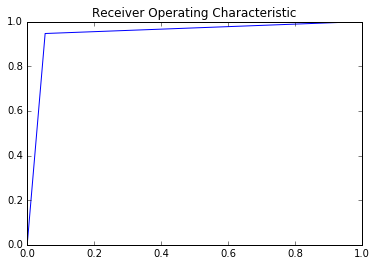

In [47]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr)

In [8]:
#try this on the knn classifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knnaccuracy = accuracy_score(y_test,y_pred)
knnprecision = precision_score(y_test,y_pred)
knnf1 = f1_score(y_test,y_pred)
knnrecall = recall_score(y_test,y_pred)
print ('knnaccuracy',knnaccuracy,'knnprecision',knnprecision)
print ('knnf1',knnf1,'knnf1',knnf1)

knnaccuracy 0.923664122137 knnprecision 0.936708860759
knnf1 0.936708860759 knnf1 0.936708860759


In [9]:
print('logistics regression auc,', auc(fpr,tpr))

logistics regression auc, 0.96482473223


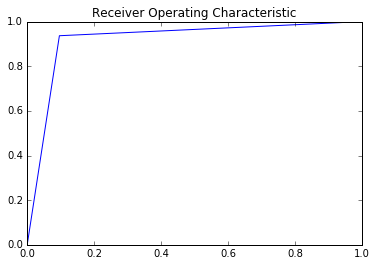

In [10]:
fpr, tpr, threshold = roc_curve(y_test,y_pred)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr)

In [11]:
print('knn auc,', auc(fpr,tpr))

knn auc, 0.920277507303


# challenge3

In [12]:
modelnames = ['KNN', 'Logistic', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
models = [KNeighborsClassifier(),LogisticRegression (),
          GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
scoretype = ['accuracy','recall','precision','f1']

for model in models:
    for score in scoretype:
        scorelist = []
        scorelist.append(cross_val_score(model,X,y,scoring = score))

In [13]:
scorelist

[array([ 0.97206704,  0.96629213,  0.94736842])]

# challenge4

In [14]:
precision_score(y_test, y_pred)

0.93670886075949367

In [15]:
recall_score(y_test, y_pred)

0.93670886075949367

# challenge5 

In [34]:
df = pd.read_csv('haberman.data',names = ['age','operationyear','nodes','survival'], header = None )
y = df['survival']
X= df.drop('survival', axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=4444 )
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:,1]
#1 is always the positive 

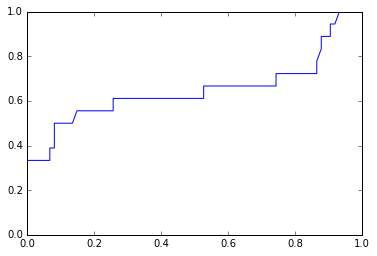

In [36]:
fpr,tpr,threshold = roc_curve(y_test,y_pred,pos_label =2) 
plt.plot(fpr,tpr)

In [38]:
print('haberman logistic regression', auc(tpr,fpr))

haberman logistic regression 0.352477477477
